MSE: 0.465
R^2: 0.626


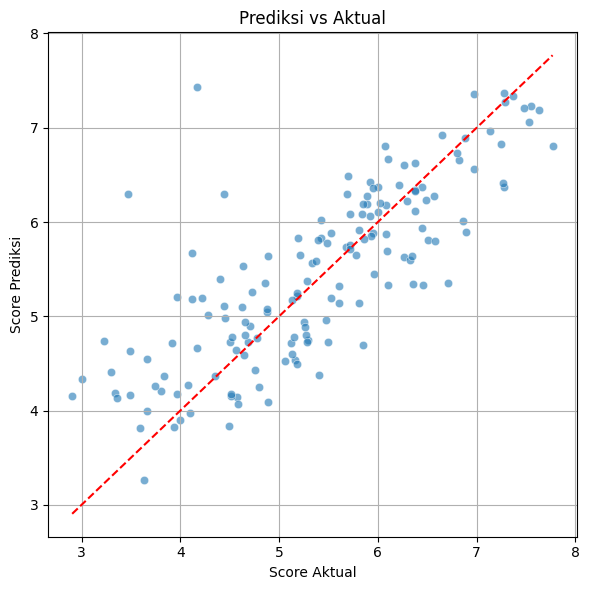


Prediksi skor kebahagiaan untuk input manual: 5.12


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

years = [2015, 2016, 2017, 2018, 2019]
all_data = []

rename_map = {
    'Country name': 'Country',
    'Country Name': 'Country',
    'Country or region': 'Country',
    'Happiness Score': 'Score',
    'Happiness.Score': 'Score',
    'Economy (GDP per Capita)': 'GDP per capita',
    'Logged GDP per capita': 'GDP per capita',
    'Healthy life expectancy': 'Healthy life expectancy',
    'Social support': 'Social support',
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',
    'Perceptions of corruption': 'Perceptions of corruption',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust': 'Perceptions of corruption'
}

for year in years:
    df = pd.read_csv(f"{year}.csv")
    df.rename(columns=rename_map, inplace=True)
    df['Year'] = year

    selected_cols = [
        'Country',
        'GDP per capita',
        'Social support',
        'Healthy life expectancy',
        'Freedom to make life choices',
        'Generosity',
        'Perceptions of corruption',
        'Score'
    ]

    df = df[[col for col in selected_cols if col in df.columns] + ['Year']]
    df.dropna(inplace=True)
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)

X = df_all.drop(columns=["Score", "Country", "Year"])
y = df_all["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.3f}")
print(f"R^2: {r2:.3f}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Score Aktual")
plt.ylabel("Score Prediksi")
plt.title("Prediksi vs Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()

manual_input = {
    "GDP per capita": 0.93,
    "Social support": 1.2,
    "Healthy life expectancy": 0.66,
    "Freedom to make life choices": 0.49,
    "Generosity": 0.49,
    "Perceptions of corruption": 0.02
}

X_manual = pd.DataFrame([manual_input])
X_manual = X_manual[X.columns]  

prediksi_manual = model.predict(X_manual)[0]
print(f"\nPrediksi skor kebahagiaan untuk input manual: {prediksi_manual:.2f}")
